# MNIST
La base de datos de dígitos manuscritos MNIST es un buen ejemplo de un conjunto de datos del mundo real que no requiere que uno se preocupe por el prepocesamiento de los mismos para comenzar a trabajar en su clasificación.
Esta base de datos cuenta con un conjunto de dígitos manuscritos producidos por una gran cantidad de personas diferentes. Estos dígitos han sido escaneados a partir de documentos impresos, y los dígitos han sido centrados y escalados a un tamaño de 28x28 pixeles usando 256 tonos de grises, de forma de hacerlos comparables entre ellos. Para este ejercicio, se cuenta con un subconjunto de la base de datos original, compuesto por 5000 patrones de entrenamiento y 1000 patrones independientes para validar la clasificación.
Ejemplos de dígitos a reconocer
Entrene una red neuronal artificial mediante backpropagation para que sea capaz de identificar cada uno de los dígitos manuscritos. Detalle la arquitectura usada y los parámetros empleados en su entrenamiento. Informe la matriz de confusión una vez realizado el entrenamiento y muestre ejemplos de imágenes a las que no se pudo reconocer y ejemplos donde la identificación fue incorrecta, ya sea porque se identificó el dígito equivocado (era un 4 y se reconoció un 7) o la red respondió reconociendo más de un único dígito (por ejemplo, era un 3 y se reconoció tanto al un 3 como a un 8).

In [1]:
import pyximport; pyximport.install()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from utils.cbackpropagation import ANN #, Identidad, Sigmoide
import utils.patrones as magia
def progreso(ann, X, T, y=None, n=-1, E=None):
    if n % 20 == 0:
        print("Pasos: {0} - Error: {1:.32f}".format(n, E)) 

In [3]:
datos = np.load('resources/mnistabridged.npz')
train_data = datos['train_data']
train_labels = datos['train_labels']
test_data = datos['test_data']
test_labels = datos['test_labels']

# Escalado al intervalo [0, 1]
X = train_data / 255.0  # Patrones de entrenamiento
X2 = test_data / 255.0  # Patrones de prueba

# Construcción de las respuestas esperadas a partir del valor del dígito
clases = np.unique(train_labels)

t = np.zeros((len(train_labels), len(clases))) 
t2 = np.zeros((len(test_labels), len(clases)))
for n, clase in enumerate(clases):
    t[train_labels.flat == clase, n] = 1
    t2[test_labels.flat == clase, n] = 1

# t tiene las respuestas esperadas para el entrenamiento
# t2 tiene las respuestas esperadas para las pruebas

In [4]:
# Crea la red neuronal
ocultas = 50 #50(0.02),50a1000veces(0.005)
entradas = X.shape[1]
salidas = t.shape[1]
ann = ANN(entradas, ocultas, salidas)
ann.reiniciar()

In [5]:
ann = ann.cargar('resources/neuronaEntrenada.npz')

In [6]:
#Entreno
E, n = ann.entrenar_rprop(X, t, min_error=0, max_pasos=1000, callback=progreso, frecuencia_callback=100)
print("\nRed entrenada en {0} pasos con un error de {1:.32f}".format(n, E))

Pasos: 100 - Error: 0.00966454825746984429180042042162
Pasos: 200 - Error: 0.00796572890119440039924381125047
Pasos: 300 - Error: 0.00727952458773277466530515766863
Pasos: 400 - Error: 0.00692115870436485740996301885275
Pasos: 500 - Error: 0.00656501255560176712883224681150
Pasos: 600 - Error: 0.00613580939463234317776674231482
Pasos: 700 - Error: 0.00600147992902979807161578662544
Pasos: 800 - Error: 0.00585694555512931720048230843645
Pasos: 900 - Error: 0.00549982581984035691358148056906
Pasos: 1000 - Error: 0.00527229269171216978484562076801

Red entrenada en 1000 pasos con un error de 0.00527229269171216978484562076801


In [8]:
#Evaluo
Y = (ann.evaluar(X2) >= 0.7).astype(np.float32)
magia.matriz_de_confusion(t2,Y,1)[0]

array([[ 74.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   8.],
       [  0., 115.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   5.],
       [  1.,   1.,  72.,   2.,   0.,   0.,   1.,   2.,   4.,   4.,  29.],
       [  1.,   0.,   0.,  79.,   1.,   2.,   0.,   0.,   1.,   2.,  21.],
       [  0.,   0.,   0.,   0.,  89.,   0.,   1.,   0.,   0.,   9.,  11.],
       [  0.,   0.,   0.,   1.,   0.,  49.,   0.,   0.,   5.,   0.,  32.],
       [  3.,   0.,   1.,   0.,   0.,   4.,  63.,   1.,   1.,   2.,  12.],
       [  0.,   0.,   1.,   0.,   1.,   0.,   0.,  72.,   0.,   5.,  20.],
       [  0.,   0.,   1.,   1.,   2.,   0.,   0.,   0.,  55.,   4.,  26.],
       [  0.,   0.,   0.,   0.,   2.,   1.,   0.,   2.,   2.,  74.,  13.]])

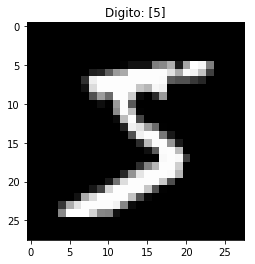

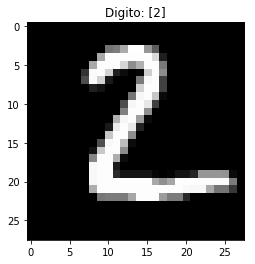

In [9]:
# Nueva figura: Muestra el primer patrón de entrenamiento
plt.figure()
plt.gray() # Para ver las imágenes en escala de grises
plt.imshow(train_data[0].reshape(28, 28))
plt.title('Digito: {0}'.format(train_labels[0]))
# Nueva figura: Muestra el primer patrón de pruebas
plt.figure()
plt.imshow(test_data[1].reshape(28, 28))
plt.title('Digito: {0}'.format(test_labels[1]))
# Muestra todas las figuras creadas y espera
plt.show()

In [11]:
ann.guardar('resources/neuronaEntrenada')

Errores encontrados

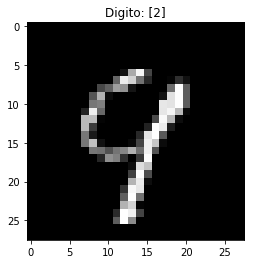

In [12]:
# Nueva figura: Muestra el patrón de pruebas erroneo
plt.figure()
plt.imshow(X2[882].reshape(28, 28))
plt.title('Digito: {0}'.format(test_labels[1]))
# Muestra todas las figuras creadas y espera
plt.show()

In [13]:
(magia.escalar(ann.evaluar(X2)[882]) >= 0.9).astype(np.float32)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)